The following list contains the coordinates (x, y) of the vertices of a five-pointed star. Display such a star on a Matplotlib chart.

Notice that the `.plot(...)` method needs data in the form of two separate lists: one with X and other with Y coordinates. You need to prepare such lists from the `points` list.

The star based only on these vertices will not have a single edge - correct this.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv('D:\\ZUZANA_DATA ANALYST\CodersLab-Course-Python-Data-Analysis\\SESSION 4 preparation exercises\\Webscraping_and_plots_-_Exercise_files\\02_Charts\\Data for plots\Meteo data.csv', sep=';', decimal='.')
 
# A list containing the starting days for the months
months_change = [0, 31, 60, 91, 121, 152, 182, 213, 244, 274, 305, 335]
# A list containing the names of the months
months_names = ['January', 'February', 'March', 'April', 'May', 'June',
                'July', 'August', 'September', 'October', 'November', 'December']

df = df.drop("Station name", axis=1)

# Dataset containing 12 values: average for monthly measurements
df_month_avg = df.groupby('Month').mean()[[
        'Average daily temperature', 'Average daily relative humidity',
        'Average daily wind speed [m/s]', 'Average daily cloud cover [oktas]'
]]
 
df_month_avg.columns = [
        'Average temperature', 'Average relative humidity',
        'Average wind speed [m/s]', 'Average daily cloud cover [oktas]'
]

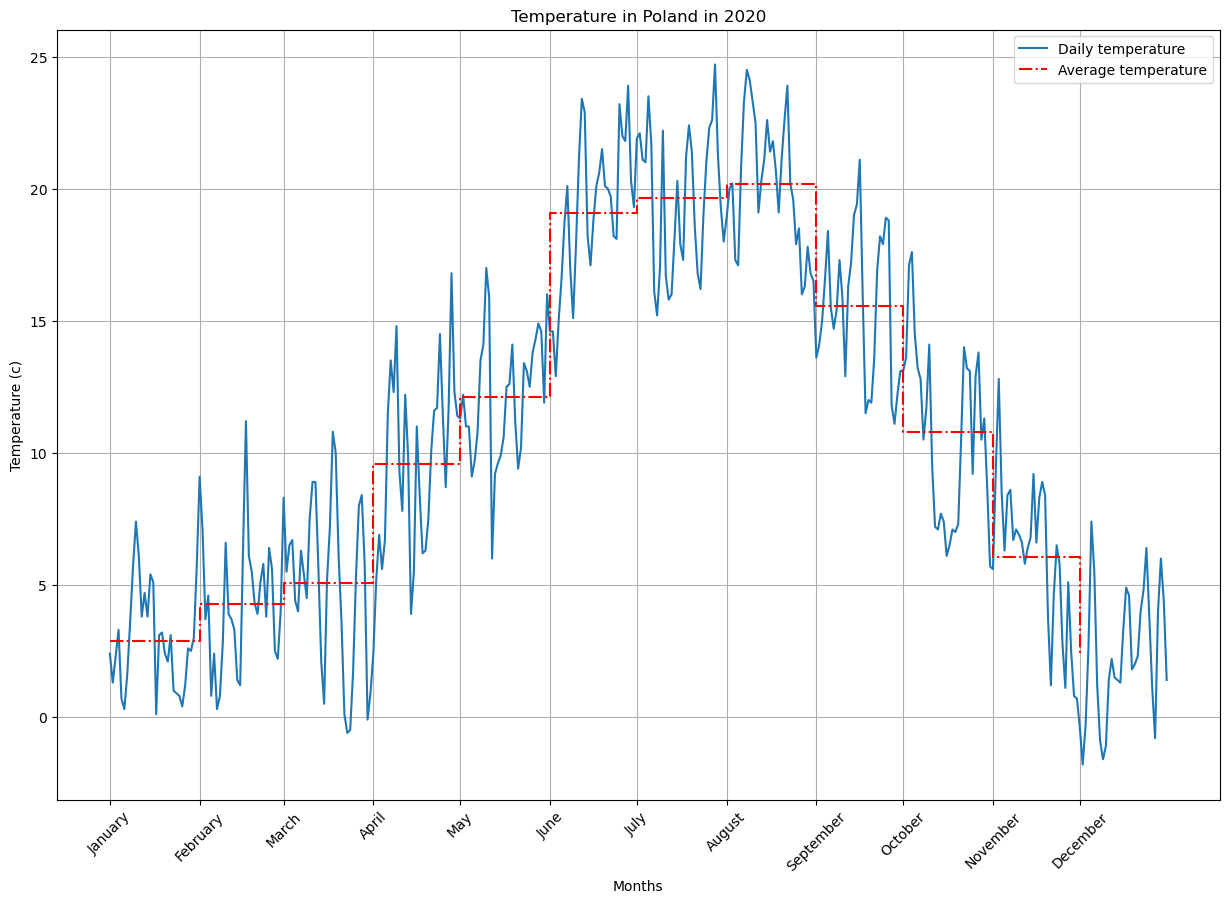

In [3]:
import matplotlib.pyplot as plt
 
plt.figure(figsize=(15,10))
plt.plot(df['Average daily temperature'], label='Daily temperature')
plt.plot(months_change, df_month_avg['Average temperature'], '-.r', label='Average temperature', drawstyle='steps-post')
plt.xticks(ticks=months_change, labels=months_names, rotation=45)
plt.ylabel('Temperature (c)')
plt.xlabel('Months')
plt.title("Temperature in Poland in 2020")
plt.legend()
plt.grid()
plt.savefig('chart_A.jpg')
plt.show()

Text(0.5, 1.0, 'Daily wind strength')

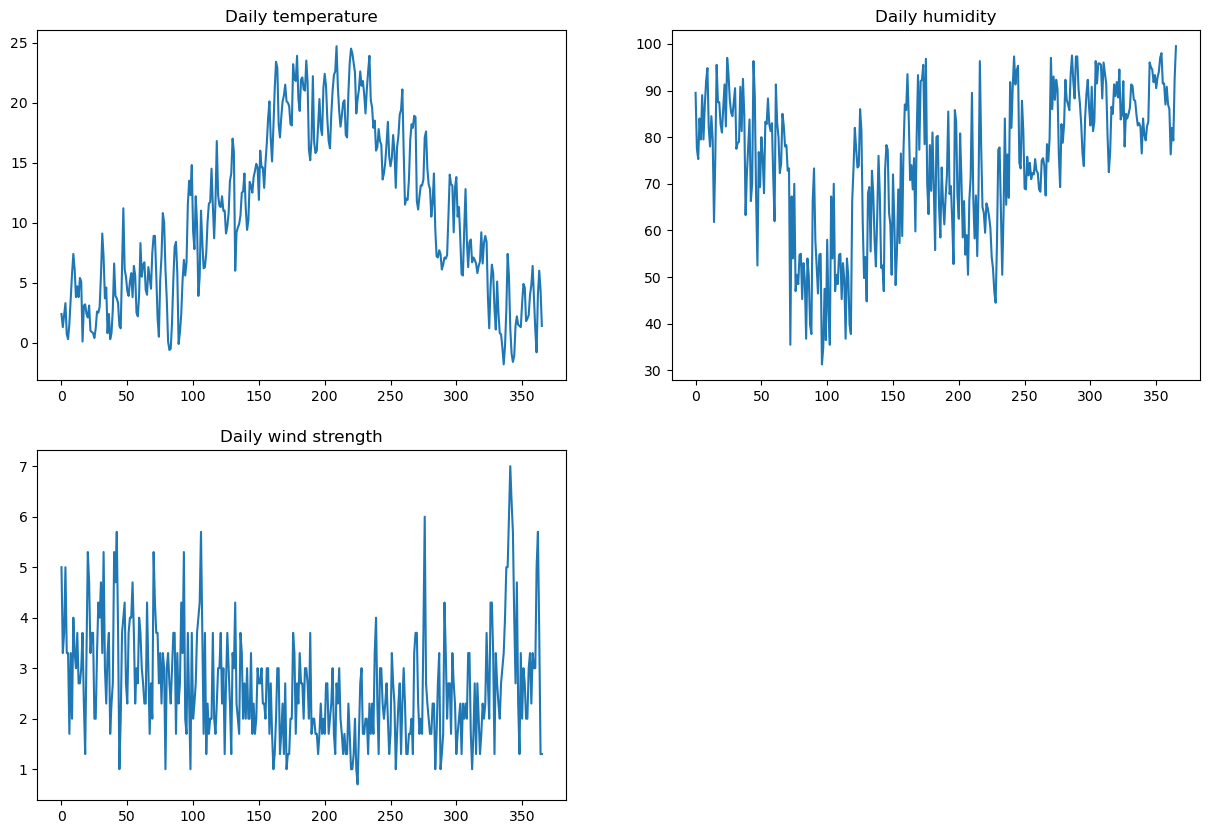

In [2]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1) # We set the first plot as the active plot.
plt.plot(df['Average daily temperature'], label='Daily temperature')
plt.title('Daily temperature')
 
plt.subplot(2,2,2) # We set the second plot as the active plot
plt.plot(df['Average daily relative humidity'], label='Daily humidity')
plt.title('Daily humidity')
 
plt.subplot(2,2,3)  # Set the third plot as the active plot
plt.plot(df['Average daily wind speed [m/s]'], label='Daily wind strength')
plt.title('Daily wind strength')

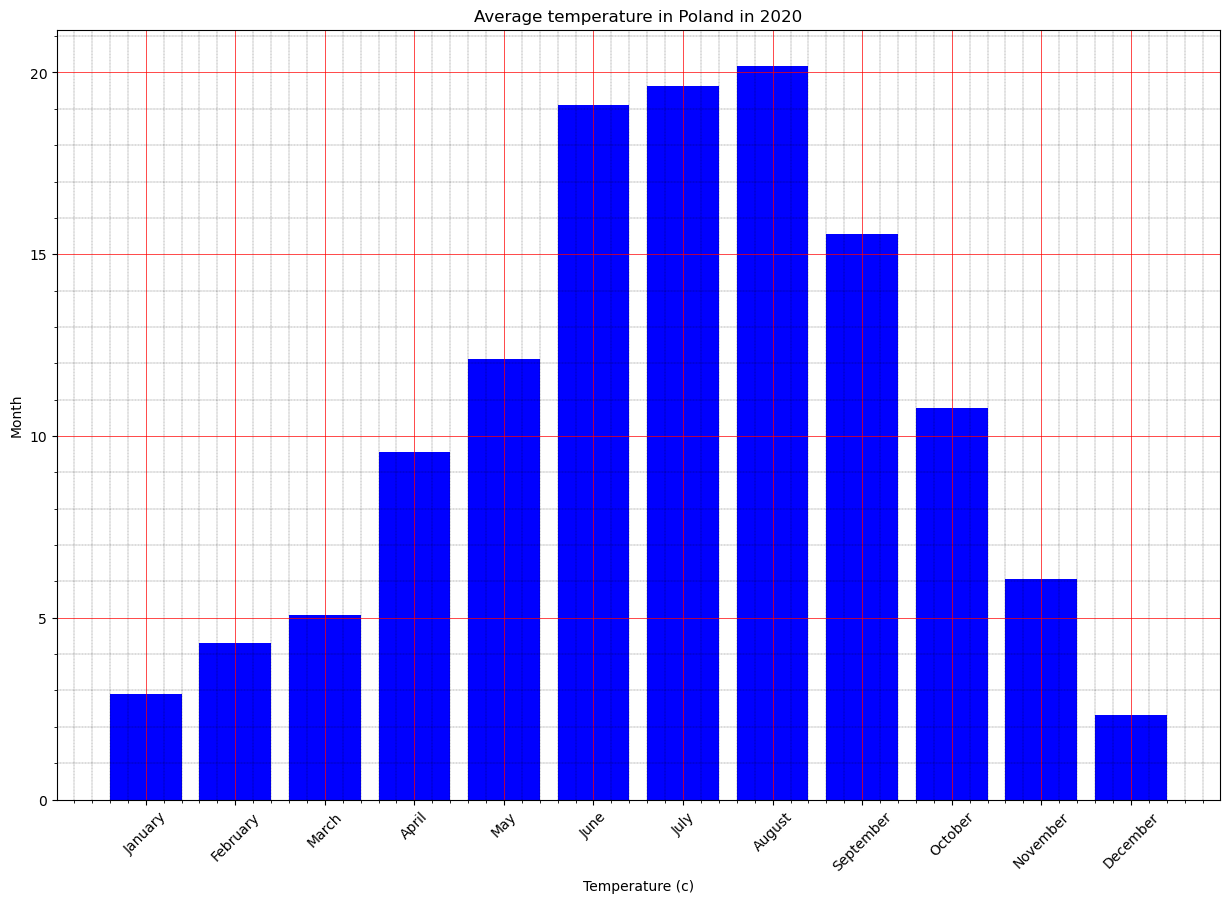

In [4]:
plt.figure(figsize=(15,10))
 
plt.bar(range(1, 13), df_month_avg['Average temperature'], color='blue')
 
plt.xticks(range(1, 13), months_names, rotation=45)
plt.yticks(range(0, 25, 5))
 
plt.title('Average temperature in Poland in 2020')
 
plt.ylabel('Month')
plt.xlabel('Temperature (c)')
 
plt.minorticks_on()
 
plt.grid(which='major', linestyle='-', linewidth='0.5', color='red')
plt.grid(which='minor', linestyle='--', linewidth='0.2', color='black')

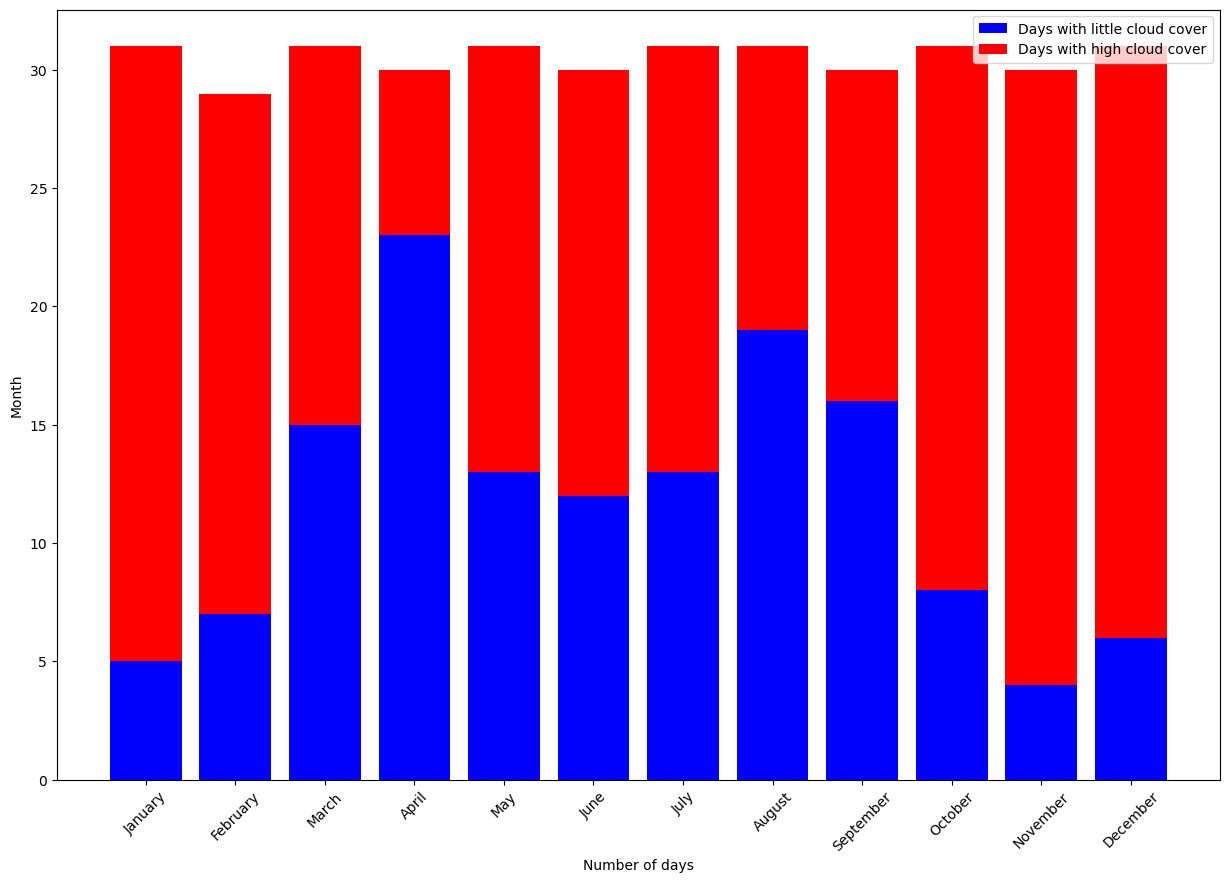

In [6]:
df_nice_days = df.loc[df['Average daily cloud cover [oktas]'] <= 4]
df_bad_days = df.loc[df['Average daily cloud cover [oktas]'] > 4]
 
s_nice_days_per_month = df_nice_days.groupby('Month').size()
s_bad_days_per_month = df_bad_days.groupby('Month').size()

plt.figure(figsize=(15,10))
 
plt.bar(range(1, 13), s_nice_days_per_month, color='blue',
        label='Days with little cloud cover')
plt.bar(range(1, 13), s_bad_days_per_month, color='red',
        bottom=s_nice_days_per_month, label='Days with high cloud cover')
 
plt.xticks(range(1, 13), months_names, rotation=45)
 
plt.ylabel('Month')
plt.xlabel('Number of days')
 
plt.legend()

Text(0.5, 1.0, 'Histogram of temperature distribution in Poland in 2020')

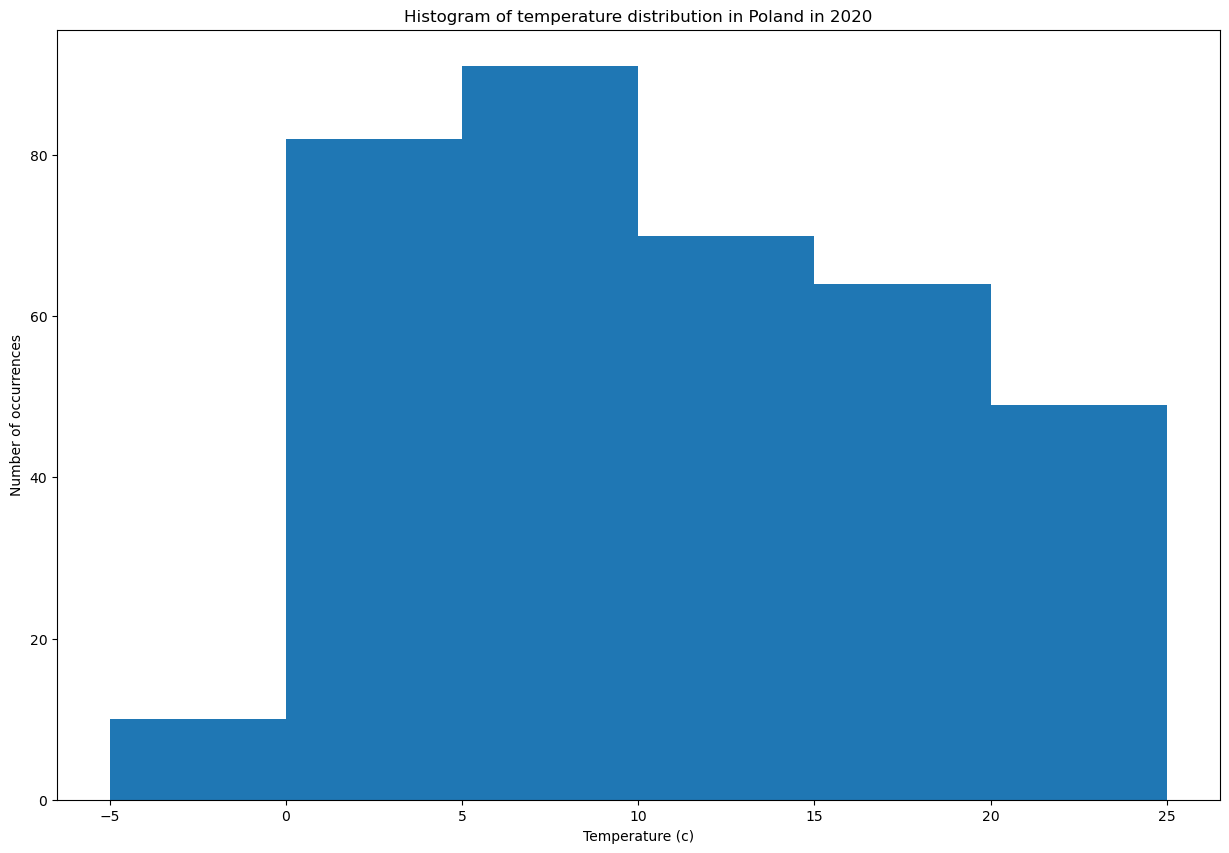

In [7]:
plt.figure(figsize=(15,10))
 
x = plt.hist(df['Average daily temperature'],bins=range(-5,30,5))
plt.ylabel('Number of occurrences')
plt.xlabel('Temperature (c)')
plt.title('Histogram of temperature distribution in Poland in 2020')

([<matplotlib.patches.Wedge at 0x1f8c1482e50>,
 [Text(0.26183663209801866, 1.0683826927143507, '80%-100%'),
  Text(-0.9148244123100591, -0.7765927469668741, '60%-80%'),
  Text(0.8262450682291332, -0.7261673961470834, '40%-60%'),
  Text(1.0951003648576172, -0.10370723643369403, '20%-40%'),
  Text(1.0999999999999963, -9.011575352898976e-08, '0-20%')],
 [Text(0.1428199811443738, 0.5827541960260094, '42.3%'),
  Text(-0.5336475738475344, -0.4530124357306765, '37.7%'),
  Text(0.45067912812498173, -0.39609130698931816, '16.9%'),
  Text(0.5973274717405184, -0.056567583509287644, '3.0%'),
  Text(0.599999999999998, -4.915404737944895e-08, '0.0%')])

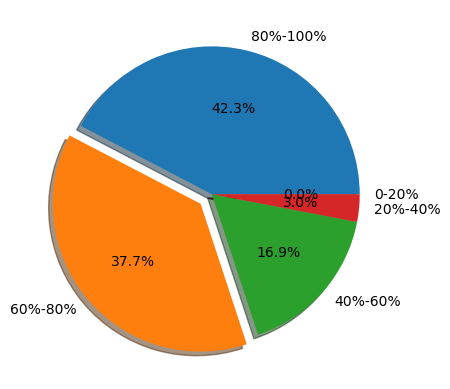

In [8]:
bins = [0, 20, 40, 60, 80, 100]
s = pd.cut(df['Average daily relative humidity'], bins=bins).value_counts()

plt.pie(s, labels=['80%-100%', '60%-80%', '40%-60%', '20%-40%', '0-20%'],
explode = [0, 0.1, 0, 0, 0], autopct='%1.1f%%', shadow=True)

Text(0.5, 1.0, 'Temperature in Poland in 2020')

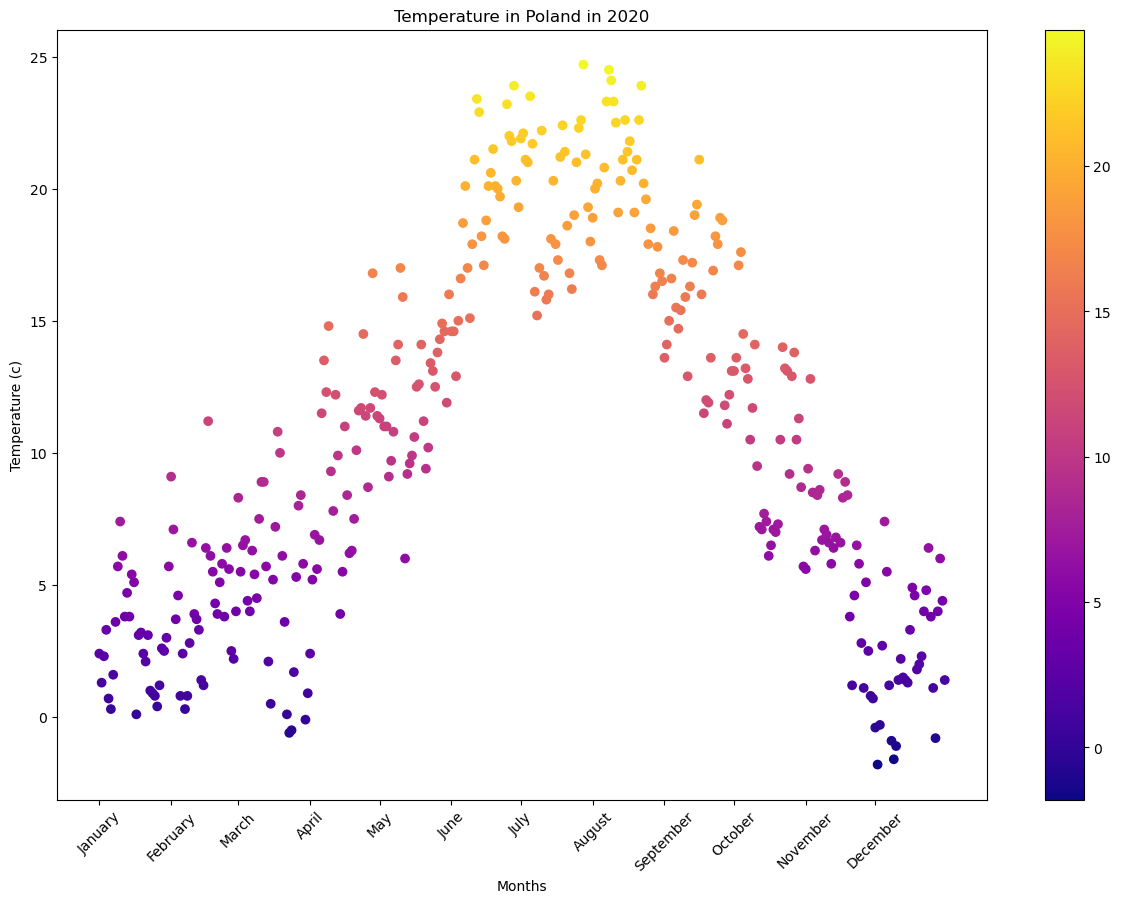

In [9]:
plt.figure(figsize=(15,10))
 
plt.scatter(df.index, df['Average daily temperature'],
            c=df['Average daily temperature'], cmap='plasma')
 
plt.xticks(months_change, months_names, rotation=45)
 
plt.ylabel('Temperature (c)')
plt.xlabel('Months')
 
plt.colorbar()  # method that displays a color map next to the plot (if used)
 
plt.title("Temperature in Poland in 2020")

Text(0.5, 0.98, 'Meteorological data in Poland (year 2020)')

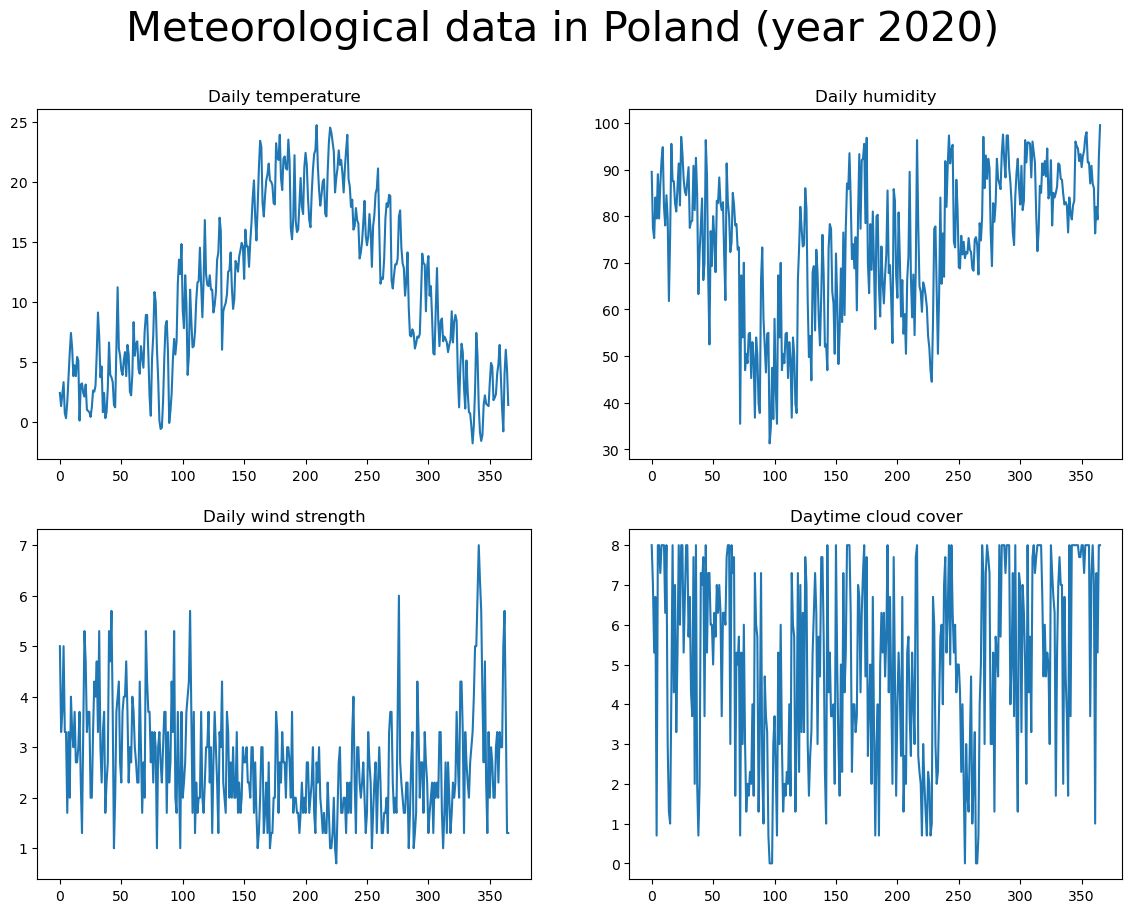

In [21]:
plt.figure(figsize=(14, 10))

plt.subplot(2,2,1) # We set the first plot as the active plot.
plt.plot(df['Average daily temperature'], label='Daily temperature')
plt.title('Daily temperature')

plt.subplot(2,2,2) # We set the second plot as the active plot
plt.plot(df['Average daily relative humidity'], label='Daily humidity')
plt.title('Daily humidity')

plt.subplot(2,2,3)  # Set the third plot as the active plot
plt.plot(df['Average daily wind speed [m/s]'], label='Daily wind strength')
plt.title('Daily wind strength')

plt.subplot(2,2,4) # We set the fourth plot as the active plot
plt.plot(df['Average daily cloud cover [oktas]'], label='Daily cloud cover')
plt.title('Daytime cloud cover')

plt.suptitle("Meteorological data in Poland (year 2020)", fontsize= 30)

C:\Users\praha\AppData\Local\Temp\ipykernel_11088\610205472.py:11: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2,2,3)  # Set the third plot as the active plot


Text(0.5, 0.98, 'Meteorological data in Poland (year 2020)')

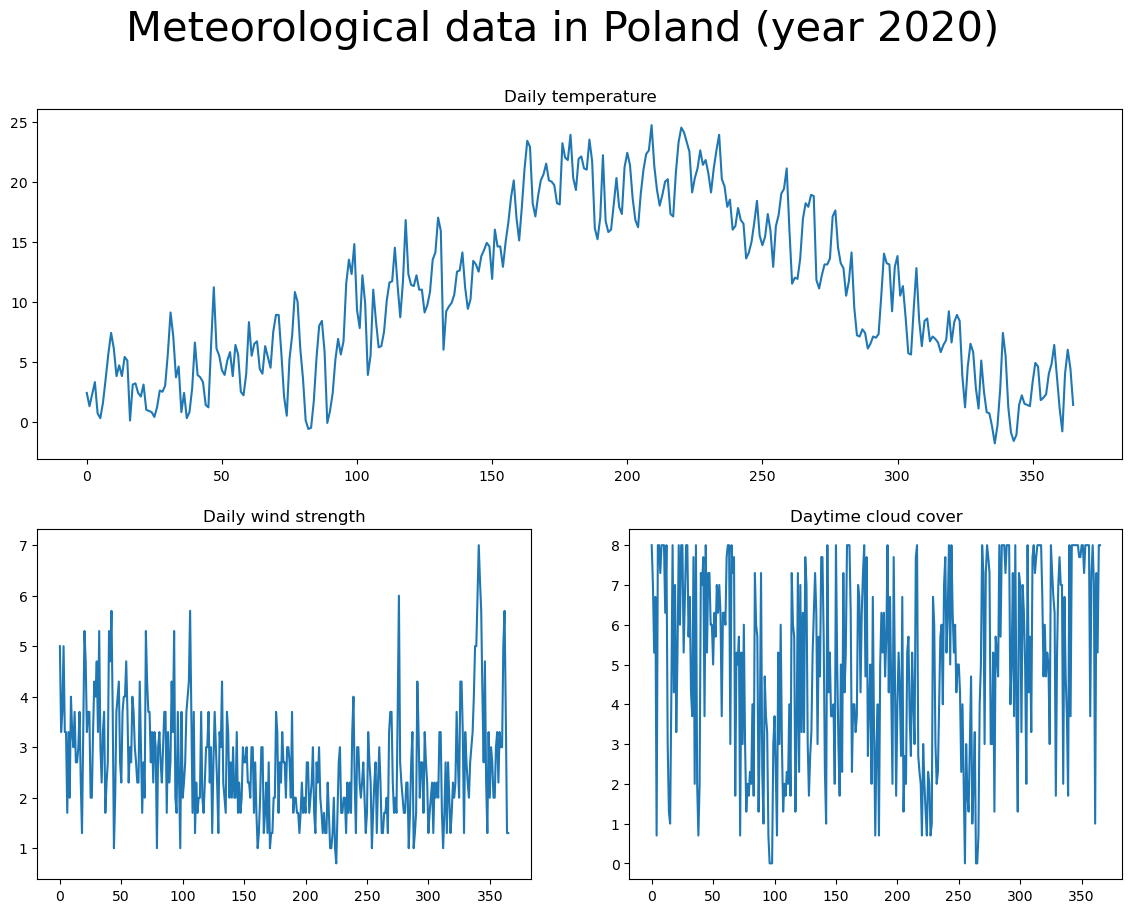

In [23]:
plt.figure(figsize=(14, 10))

ax1 = plt.subplot(2,1,1)
plt.plot(df['Average daily temperature'], label='Daily temperature')
plt.title("Daily temperature")
 
plt.subplot(2,1,2, sharey=ax1)
plt.plot(df['Average daily relative humidity'], label='Daily humidity')
plt.title("Daily humidity")

plt.subplot(2,2,3)  # Set the third plot as the active plot
plt.plot(df['Average daily wind speed [m/s]'], label='Daily wind strength')
plt.title('Daily wind strength')

plt.subplot(2,2,4) # We set the fourth plot as the active plot
plt.plot(df['Average daily cloud cover [oktas]'], label='Daily cloud cover')
plt.title('Daytime cloud cover')

plt.suptitle("Meteorological data in Poland (year 2020)", fontsize= 30)

Text(0.5, 0.98, 'Meteorological data in Poland (year 2020)')

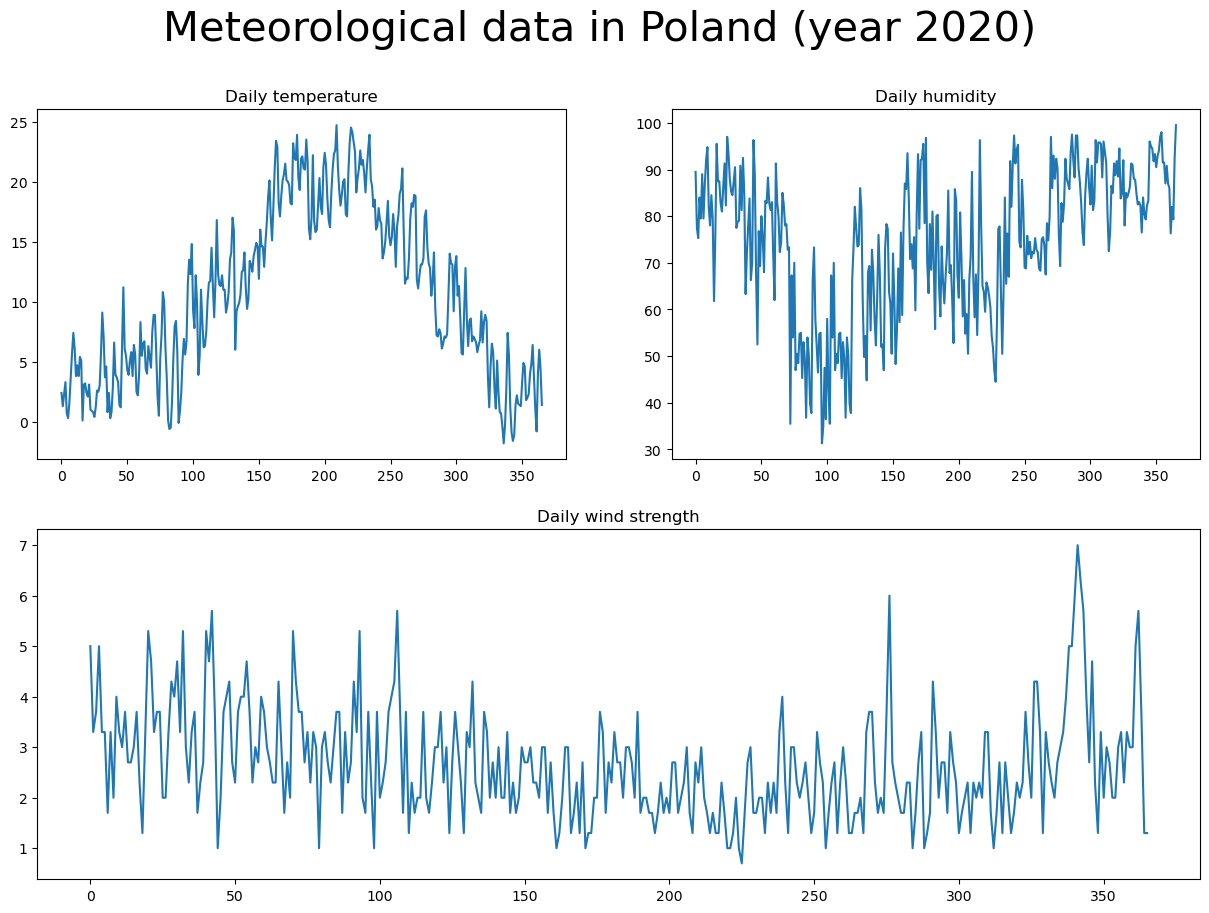

In [24]:
plt.figure(figsize=(15,10))
plt.subplot2grid((2,2),(0,0))
plt.plot(df['Average daily temperature'], label='Daily temperature')
plt.title("Daily temperature")
 
plt.subplot2grid((2,2),(0,1))
plt.plot(df['Average daily relative humidity'], label='Daily humidity')
plt.title("Daily humidity")
 
plt.subplot2grid((2,2),(1,0), colspan=2)
plt.plot(df['Average daily wind speed [m/s]'], label='Daily wind strength')
plt.title("Daily wind strength")
 
plt.suptitle("Meteorological data in Poland (year 2020)", fontsize= 30) 

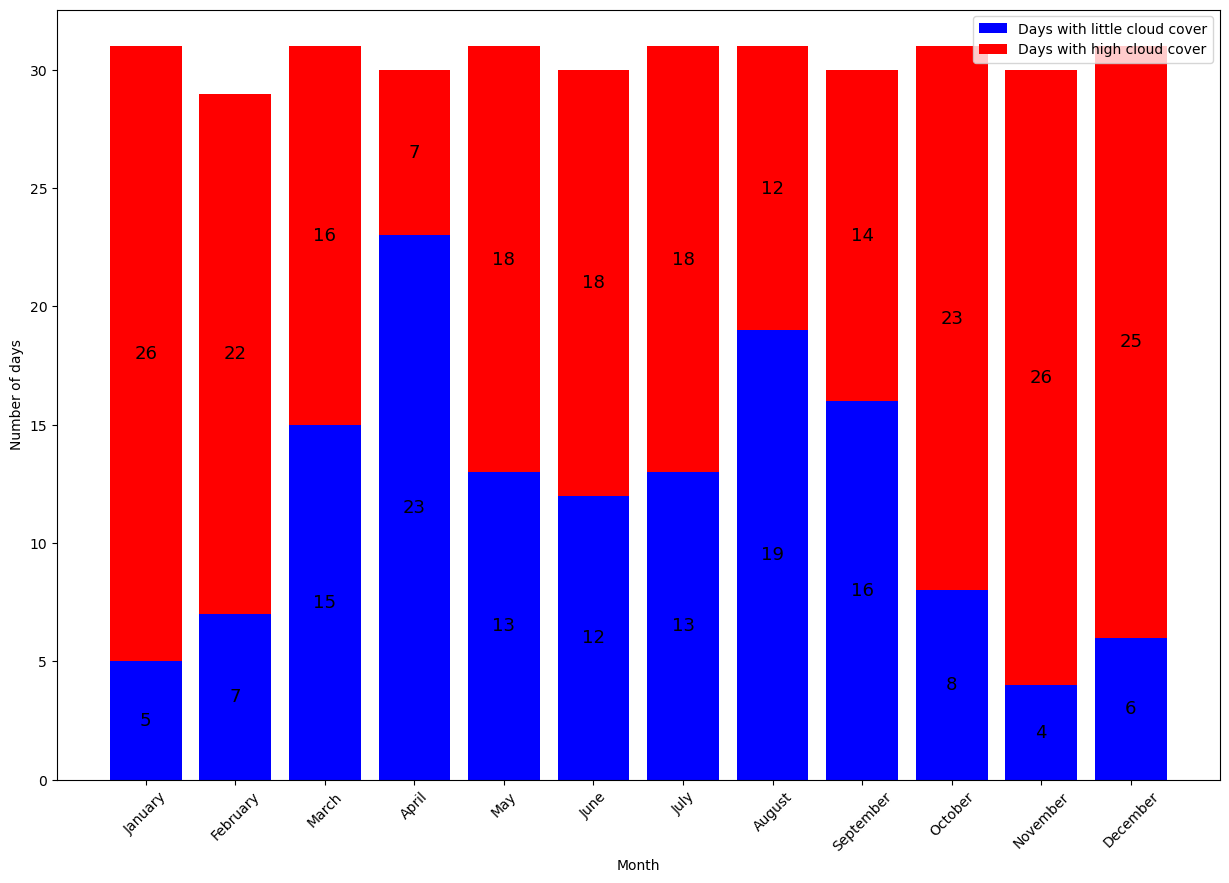

In [26]:
plt.figure(figsize=(15,10))
plt.bar(range(1, 13), s_nice_days_per_month, color='blue', label="Days with little cloud cover")
plt.bar(range(1, 13), s_bad_days_per_month, color='red', bottom=s_nice_days_per_month, label="Days with high cloud cover")
plt.xticks(range(1, 13), months_names, rotation=45)
plt.ylabel('Number of days')
plt.xlabel('Month')
plt.legend()
 
for i in range(0, 12):
    plt.text(i+1, s_nice_days_per_month.iloc[i] / 2, f"{s_nice_days_per_month.iloc[i]}", ha = 'center', va = 'center', fontsize = 13)
    plt.text(i+1, s_nice_days_per_month.iloc[i] + (s_bad_days_per_month.iloc[i] / 2), f"{s_bad_days_per_month.iloc[i]}", ha = 'center', va = 'center', fontsize = 13)

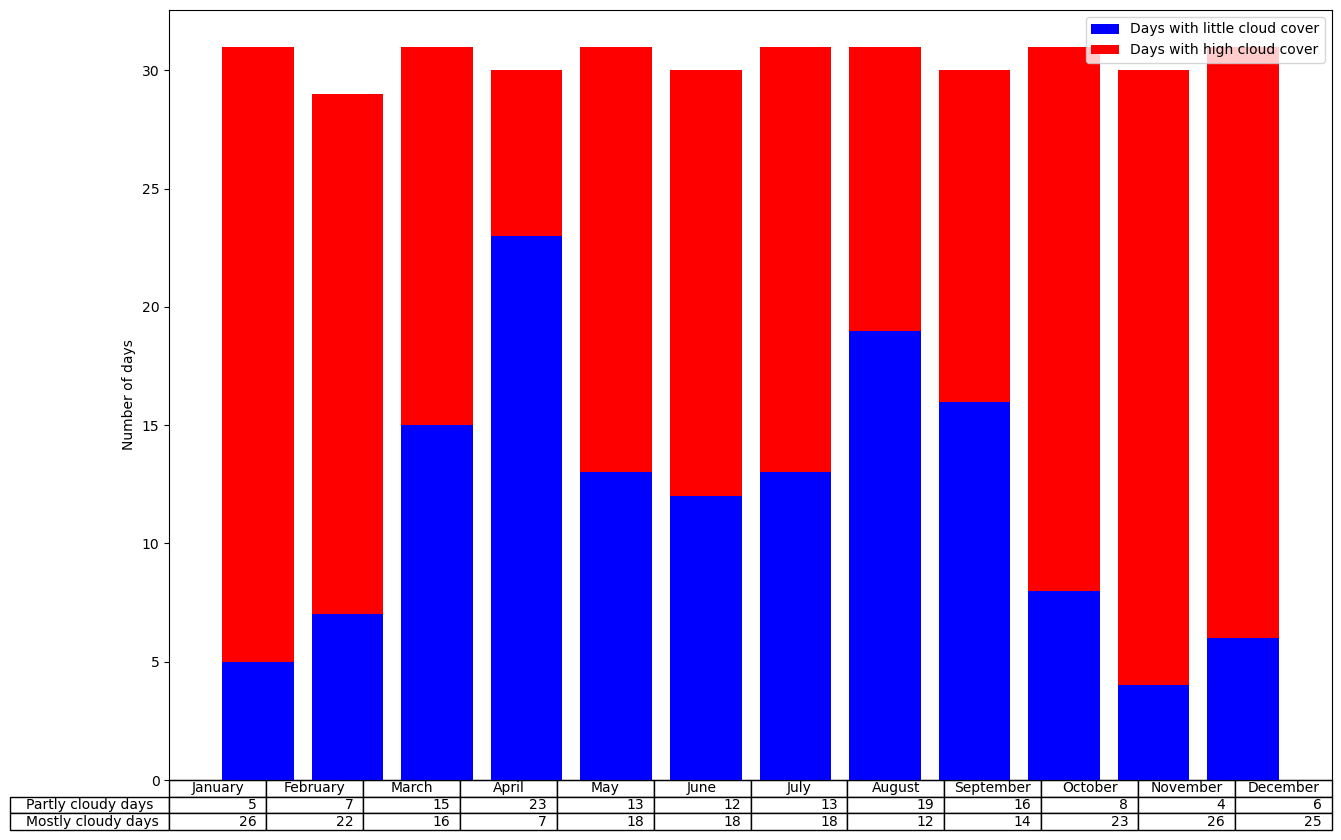

In [27]:
plt.figure(figsize=(15,10))
plt.bar(range(1, 13), s_nice_days_per_month, color='blue', label="Days with little cloud cover")
plt.bar(range(1, 13), s_bad_days_per_month, color='red', bottom=s_nice_days_per_month, label="Days with high cloud cover")
plt.ylabel('Number of days')
plt.legend()
plt.xticks([]) #transforming an empty list results in no interval on the X axis
 
plt.table(cellText=[s_nice_days_per_month.tolist(), s_bad_days_per_month.tolist()],
          rowLabels=['Partly cloudy days', 'Mostly cloudy days'],
          colLabels=months_names,
          loc='bottom')

Text(13, 12, 'Profitability limit of photovoltaic panels')

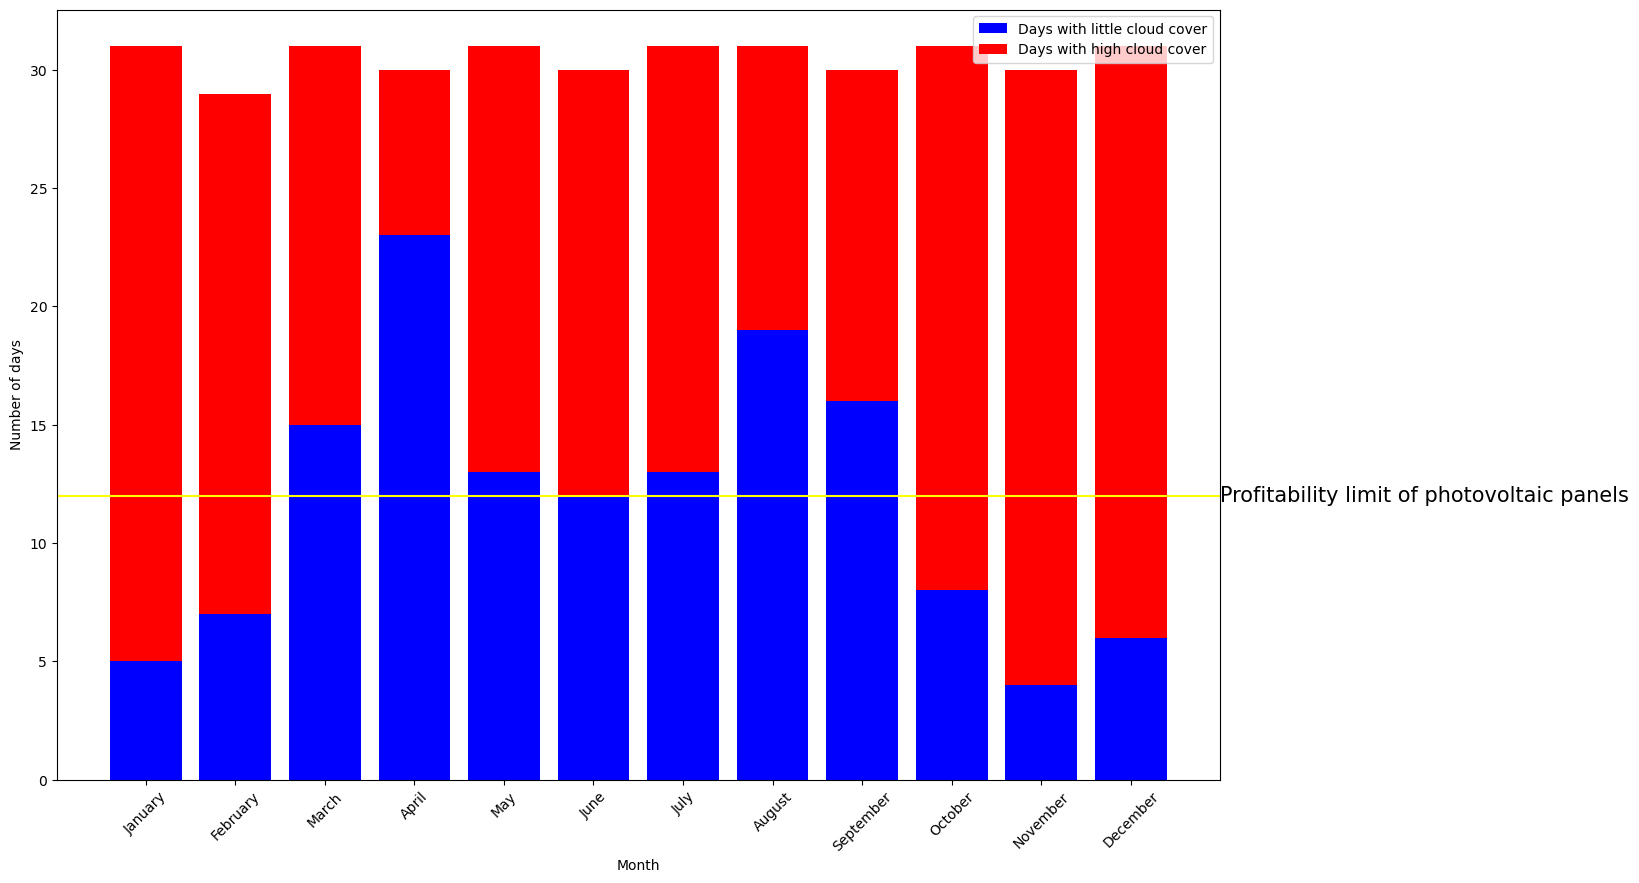

In [28]:
plt.figure(figsize=(15,10))
plt.bar(range(1, 13), s_nice_days_per_month, color='blue', label="Days with little cloud cover")
plt.bar(range(1, 13), s_bad_days_per_month, color='red', bottom=s_nice_days_per_month, label="Days with high cloud cover")
plt.xticks(range(1, 13), months_names, rotation=45)
plt.ylabel('Number of days')
plt.xlabel('Month')
plt.legend()
 
plt.axhline(12, color = "yellow")
plt.text(13, 12, "Profitability limit of photovoltaic panels", fontsize=15, va = 'center')

Text(300, 21, 'Weather breakdown')

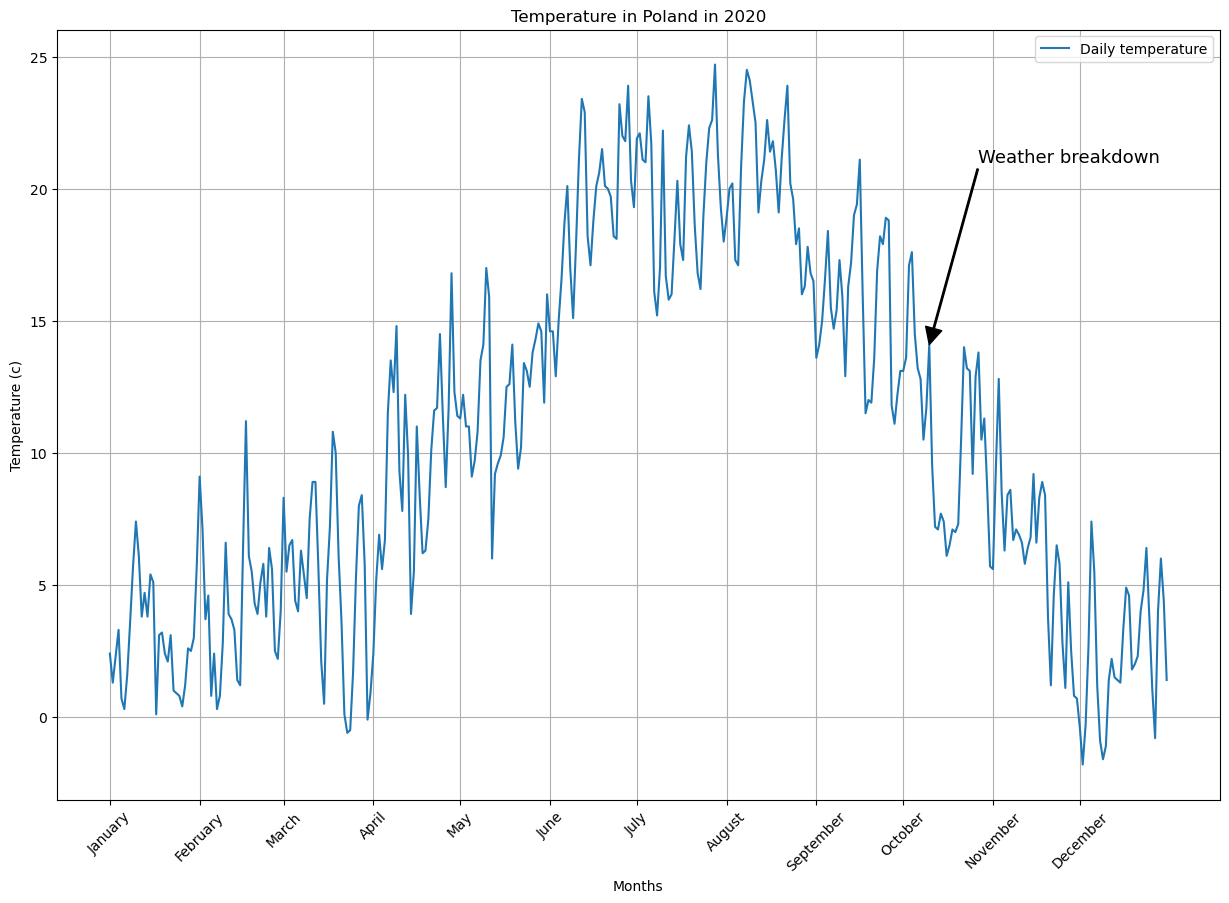

In [29]:
plt.figure(figsize=(15,10))
plt.plot(df['Average daily temperature'], label='Daily temperature')
plt.xticks(months_change, months_names, rotation=45)
plt.ylabel('Temperature (c)')
plt.xlabel('Months')
plt.title('Temperature in Poland in 2020')
plt.legend()
plt.grid()
 
plt.annotate('Weather breakdown', xy=(283, df['Average daily temperature'].iloc[283]), fontsize=13,
             xytext=(300, 21), arrowprops=dict(facecolor='black', width=1))

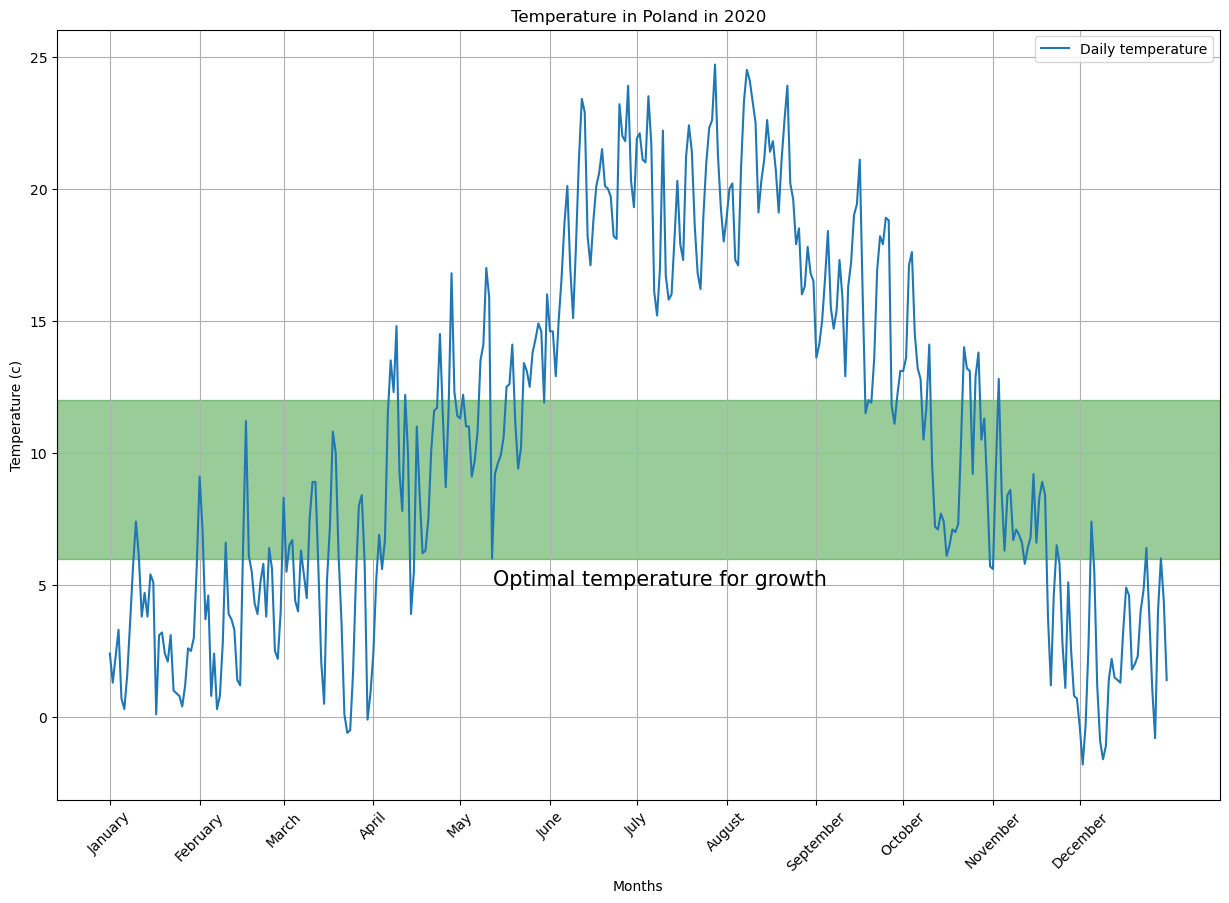

In [30]:
plt.figure(figsize=(15,10))
plt.plot(df['Average daily temperature'], label='Daily temperature')
plt.xticks(months_change, months_names, rotation=45)
plt.ylabel('Temperature (c)')
plt.xlabel('Months')
plt.title("Temperature in Poland in 2020")
plt.legend()
plt.grid()
 
plt.axhspan(6, 12, color='green', alpha=0.4)
plt.text(190, 5, "Optimal temperature for growth", fontsize=15, ha = 'center')
plt.show()

[[[247 247 247]
  [247 247 247]
  [247 247 247]
  ...
  [247 247 247]
  [247 247 247]
  [247 247 247]]

 [[247 247 247]
  [247 247 247]
  [247 247 247]
  ...
  [247 247 247]
  [247 247 247]
  [247 247 247]]

 [[247 247 247]
  [247 247 247]
  [247 247 247]
  ...
  [247 247 247]
  [247 247 247]
  [247 247 247]]

 ...

 [[247 247 247]
  [247 247 247]
  [247 247 247]
  ...
  [247 247 247]
  [247 247 247]
  [247 247 247]]

 [[247 247 247]
  [247 247 247]
  [247 247 247]
  ...
  [247 247 247]
  [247 247 247]
  [247 247 247]]

 [[247 247 247]
  [247 247 247]
  [247 247 247]
  ...
  [247 247 247]
  [247 247 247]
  [247 247 247]]]
[247 247 247 ... 247 247 247]


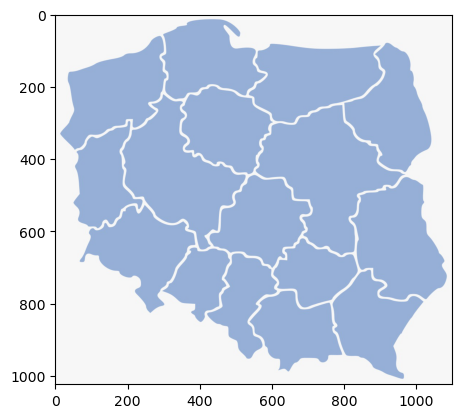

In [32]:
import matplotlib.image as mpimg
 
img = mpimg.imread('./Poland_map.jpg')
plt.imshow(img)
print(img)
print(img.ravel())

array([<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
       <Axes: >, <Axes: >], dtype=object)

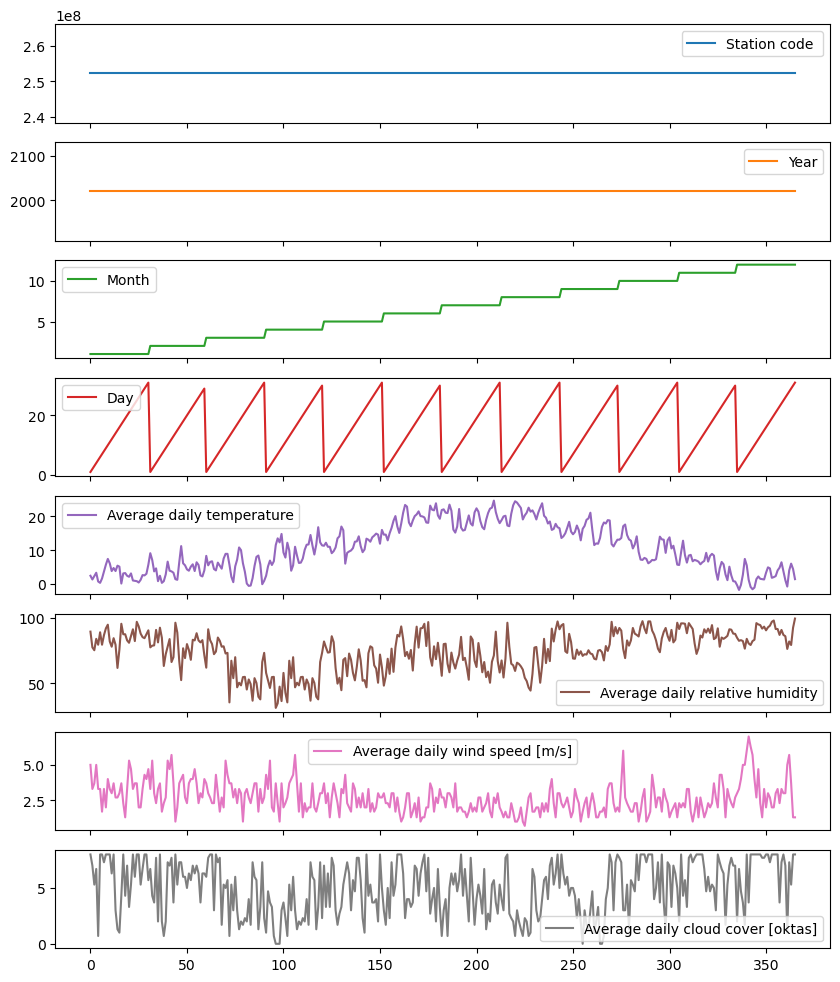

In [33]:
import pandas as pd

df.plot(subplots=True, figsize=(10, 12))

<Axes: xlabel='timepoint', ylabel='signal'>

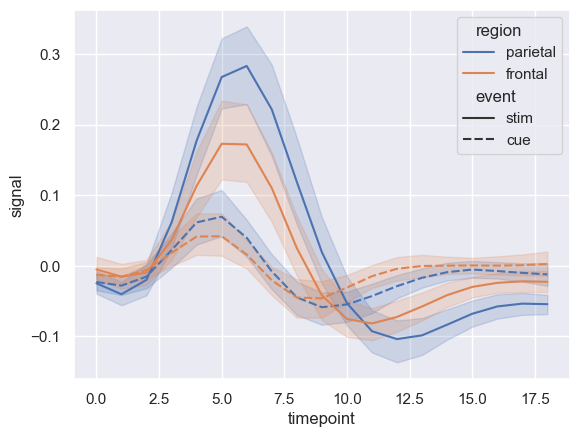

In [34]:
import seaborn as sns
sns.set_theme(style="darkgrid")

# Load an example dataset with long-form data
fmri = sns.load_dataset("fmri")

# Plot the responses for different events and regions
sns.lineplot(x="timepoint", y="signal",
             hue="region", style="event",
             data=fmri)